                        Exploratory Data Analysis Project for a Loyalty system presented by an airline company : 2017 to 2018 

1- Read in the data

In [3]:
import pandas as pd
Flight = pd.read_csv('Customer Flight Activity.csv')
Customer = pd.read_csv('Customer Loyalty History.csv')

2-Quick insights into the dataset

In [5]:
print(Flight.shape)
print(Flight.info())
print(Flight.head())

(392936, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB
None
   Loyalty Number  Year  Month  Total Flights  Distance  Points Accumulated  \
0          100590  2018      6             12     15276             22914.0   
1          100590  2018      7             12      9168             13752.

* The first table focuses on the number of flights taken by a customer each month.* 
The second table provides general information about the client.

First Dataset: Monthly Flight Data
Shape: 392,936 rows × 8 columns

Second Dataset: Client Information
Shape: 16,737 rows × 16 columns

In [7]:
Flight.describe()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000,392936.000000
mean,550527.519034,2017.513661,6.513661,1.294888,1941.440201,2027.172345,31.304263,5.635661
std,258604.580187,0.499814,3.445428,1.962675,3239.975889,3872.139841,126.653775,22.801167
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,327688.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551833.000000,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,772194.000000,2018.000000,10.000000,2.000000,3018.000000,3039.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,28.000000,67284.000000,100926.000000,876.000000,158.000000


In [9]:
missing_values = Flight.isnull().sum()
unique_values = Flight.nunique()
missing_values, unique_values

(Loyalty Number                 0
 Year                           0
 Month                          0
 Total Flights                  0
 Distance                       0
 Points Accumulated             0
 Points Redeemed                0
 Dollar Cost Points Redeemed    0
 dtype: int64,
 Loyalty Number                 16737
 Year                               2
 Month                             12
 Total Flights                     17
 Distance                        9456
 Points Accumulated             10284
 Points Redeemed                  587
 Dollar Cost Points Redeemed      108
 dtype: int64)

* The flight activity data spans 2 years (likely 2017 and 2018) and 12 months for each year.

* Most customers don't fly every month, with 50% having 0 flights per month

* On average, customers redeem 31 points per month, but many customers don't redeem points, as 75% of entries have 0 points redeemed.

* There are no null values in the dataset, but there is a significant amount of duplicated data. The dataset contains like 392,000 rows, while there are only 16,737 unique loyalty numbers. This suggests that the data records the customer’s flight history, even for months when they did not take any flights.

Data Distrubition analysis

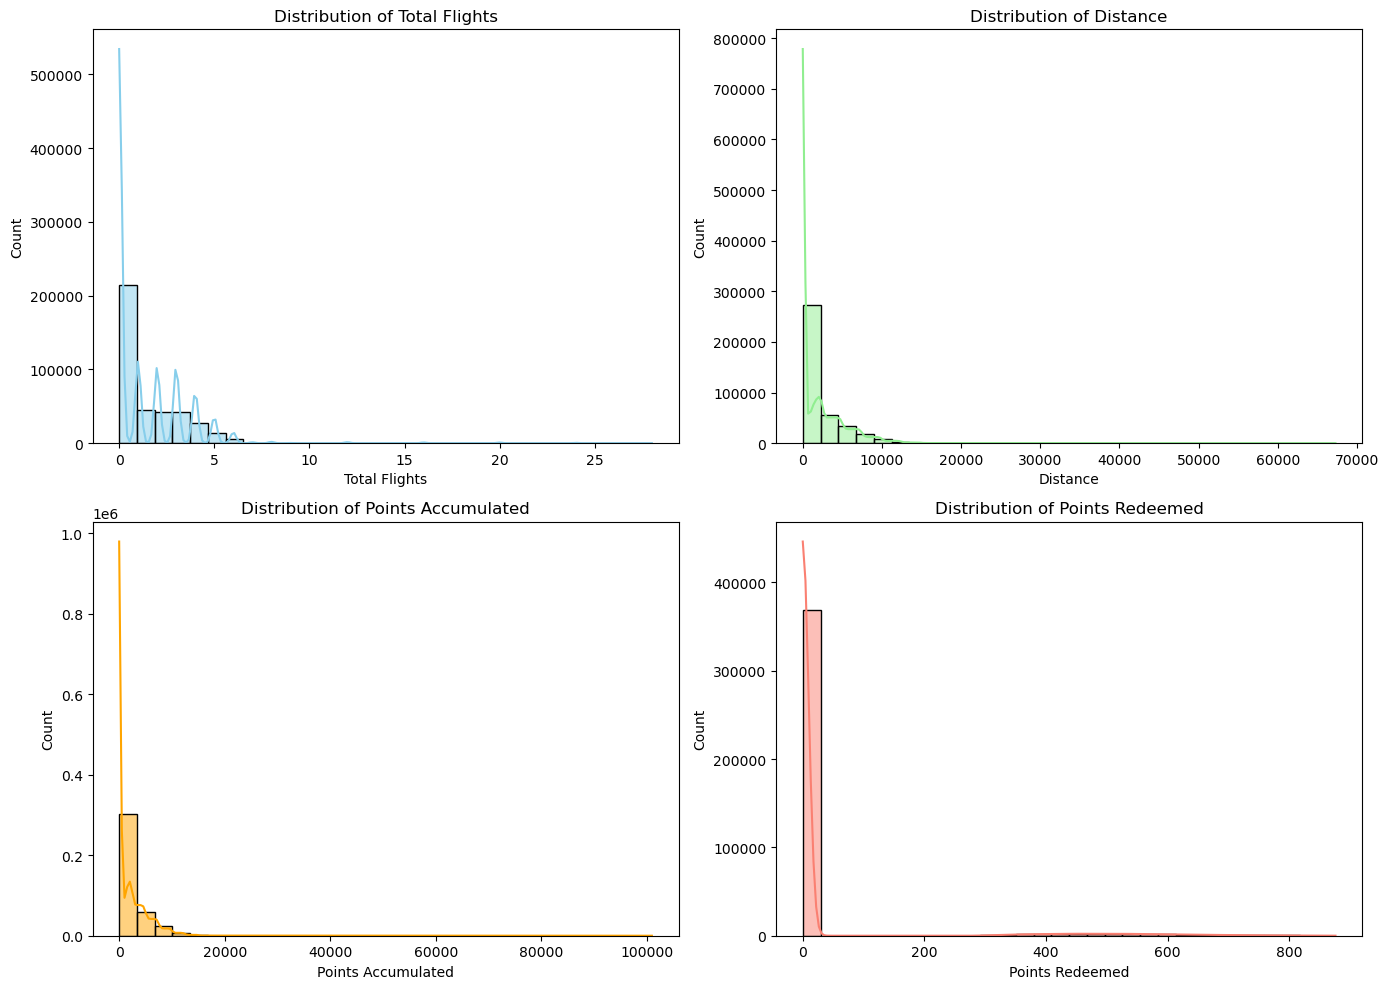

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(Flight['Total Flights'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Total Flights')
sns.histplot(Flight['Distance'], bins=30, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Distance')
sns.histplot(Flight['Points Accumulated'], bins=30, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of Points Accumulated')
sns.histplot(Flight['Points Redeemed'], bins=30, kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Distribution of Points Redeemed')
plt.tight_layout()
plt.show()

* As previously mentioned, there are many customers who did not fly at all (more than 200,000). Additionally, the average customer took between 1 and 5 flights, with only a few taking more than 7 flights overall.
* Furthermore, almost all customers did not use their accumulated points.

* Trends in total flights, distance traveled, and points accumulated over time.

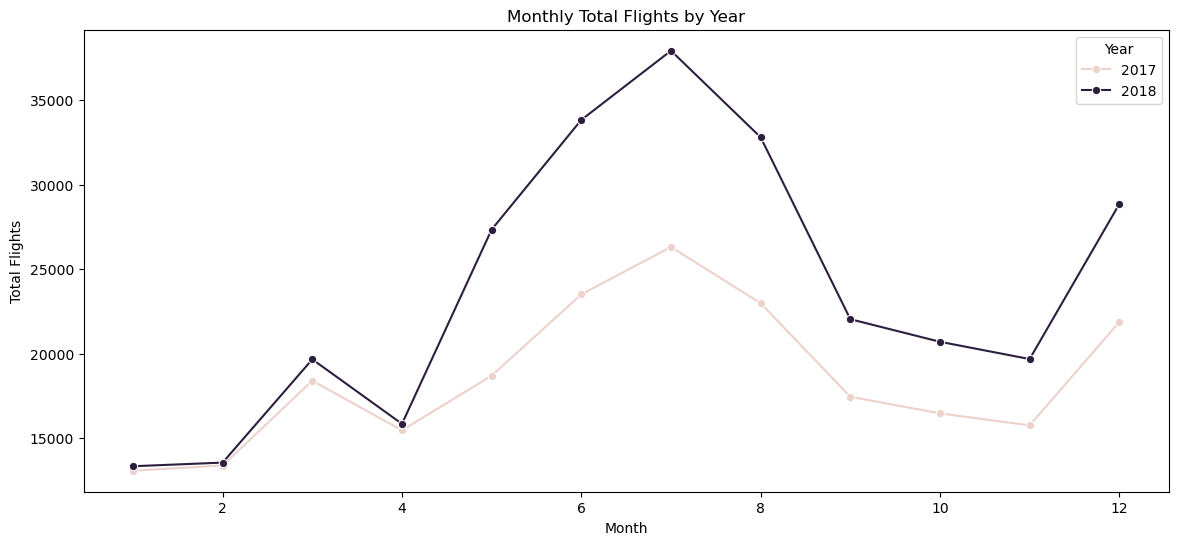

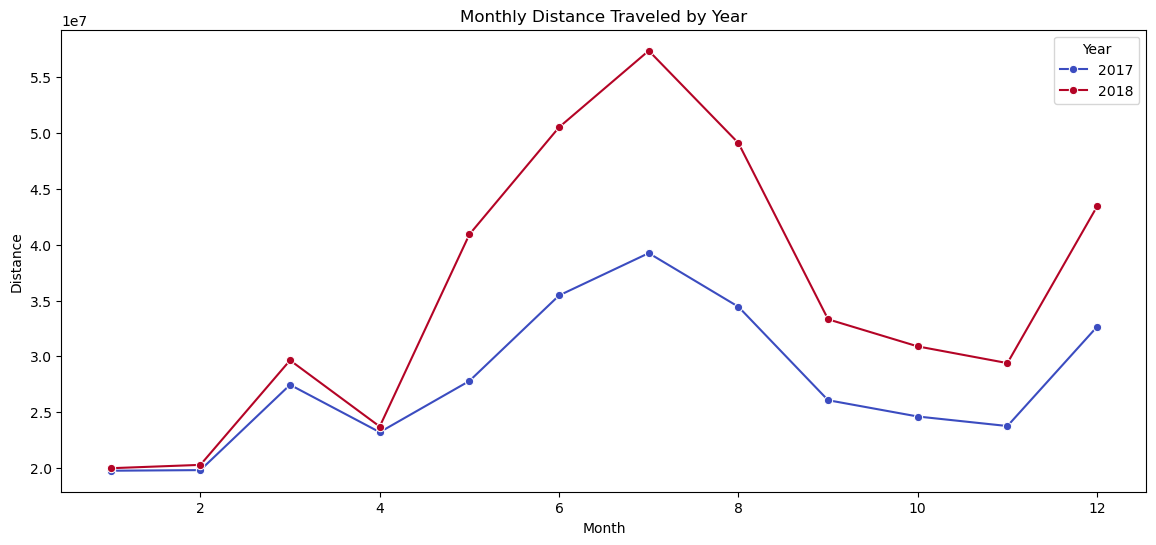

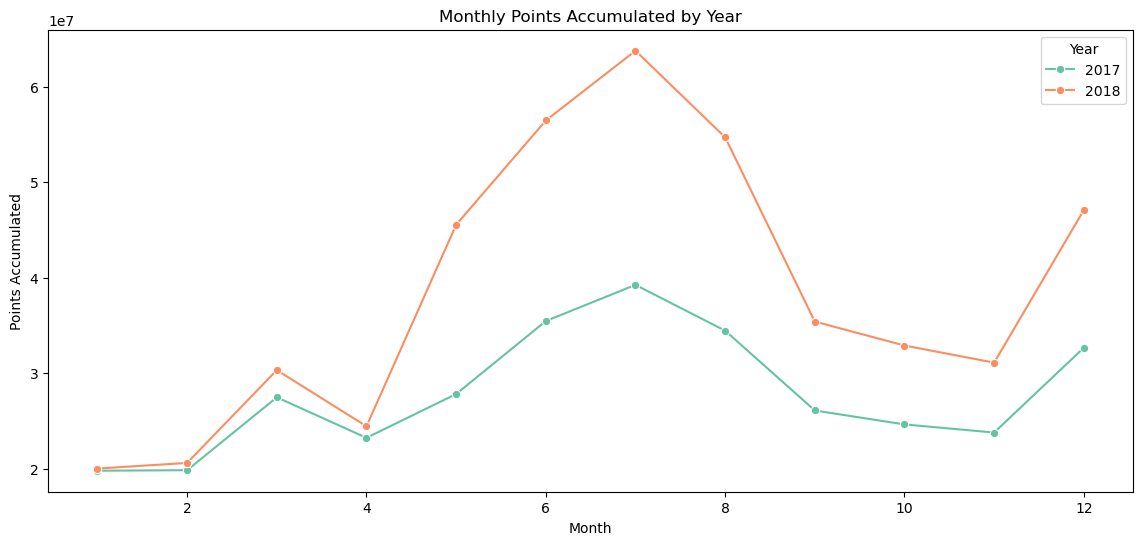

In [778]:
monthly_trends = Flight.groupby(['Year', 'Month']).sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='Total Flights', hue='Year', data=monthly_trends, marker='o')
plt.title('Monthly Total Flights by Year')
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='Distance', hue='Year', data=monthly_trends, marker='o', palette="coolwarm")
plt.title('Monthly Distance Traveled by Year')
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='Points Accumulated', hue='Year', data=monthly_trends, marker='o', palette="Set2")
plt.title('Monthly Points Accumulated by Year')
plt.show()


* Here we can see that the number of flights are interessting between the month 4 and 8 and again in months 11 and 12 and almost stable for the rest of months
* the year 2018 have seen a more flights over 2017 specially starting from the month 4

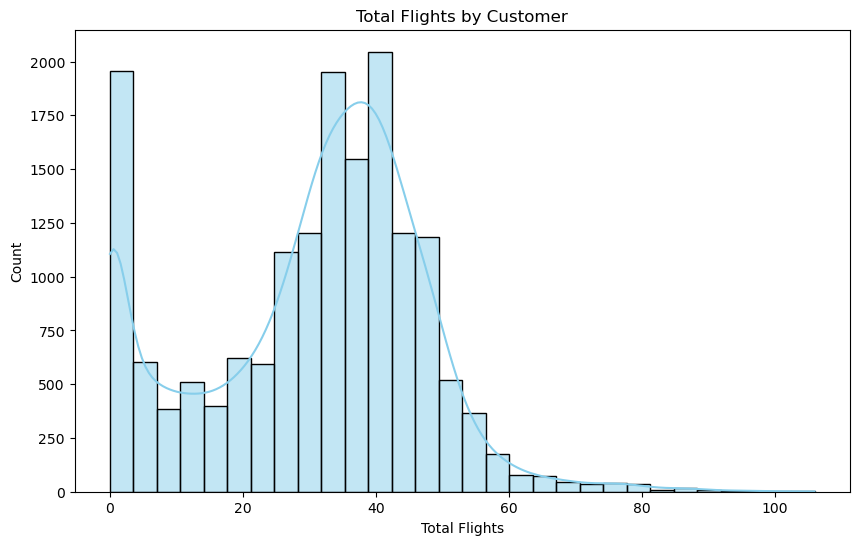

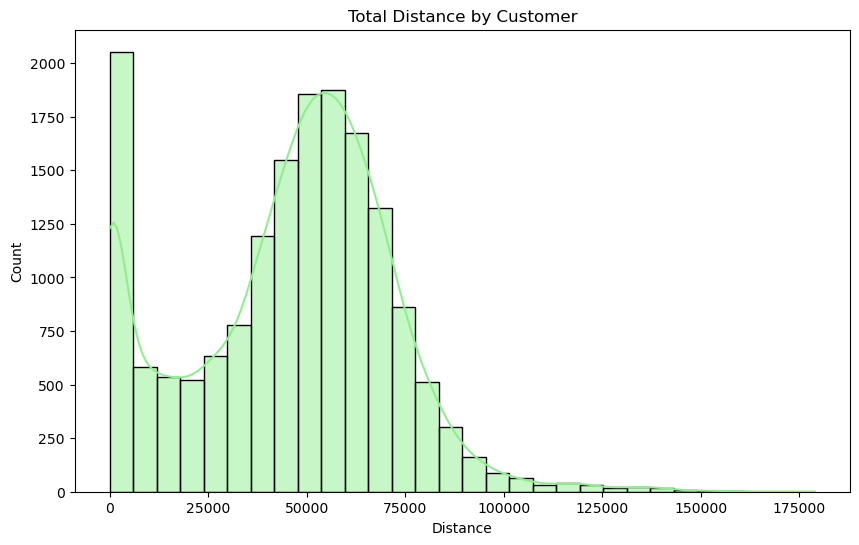

In [13]:
customer_activity = Flight.groupby('Loyalty Number').sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(customer_activity['Total Flights'], bins=30, kde=True, color='skyblue')
plt.title('Total Flights by Customer')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_activity['Distance'], bins=30, kde=True, color='lightgreen')
plt.title('Total Distance by Customer')
plt.show()


* These histograms will show you how active different customers are, looking at their total number of flights and the distance they traveled.

Outliers detection 

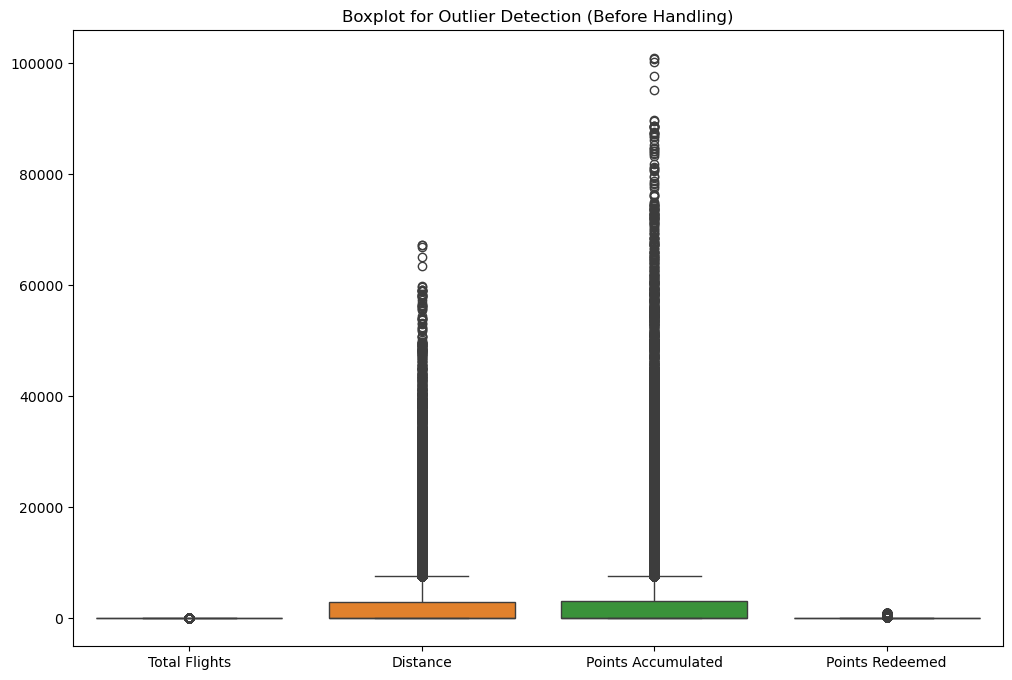

In [782]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=Flight[['Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed']])
plt.title('Boxplot for Outlier Detection (Before Handling)')
plt.show()

* this is due to more then 50% of cutsomers have 0 flights and 0 points accumulated so i will try to filter the data first then check it again 

* Outlier Handling: 
* I will first filter out customers with zero flights and then apply capping techniques 

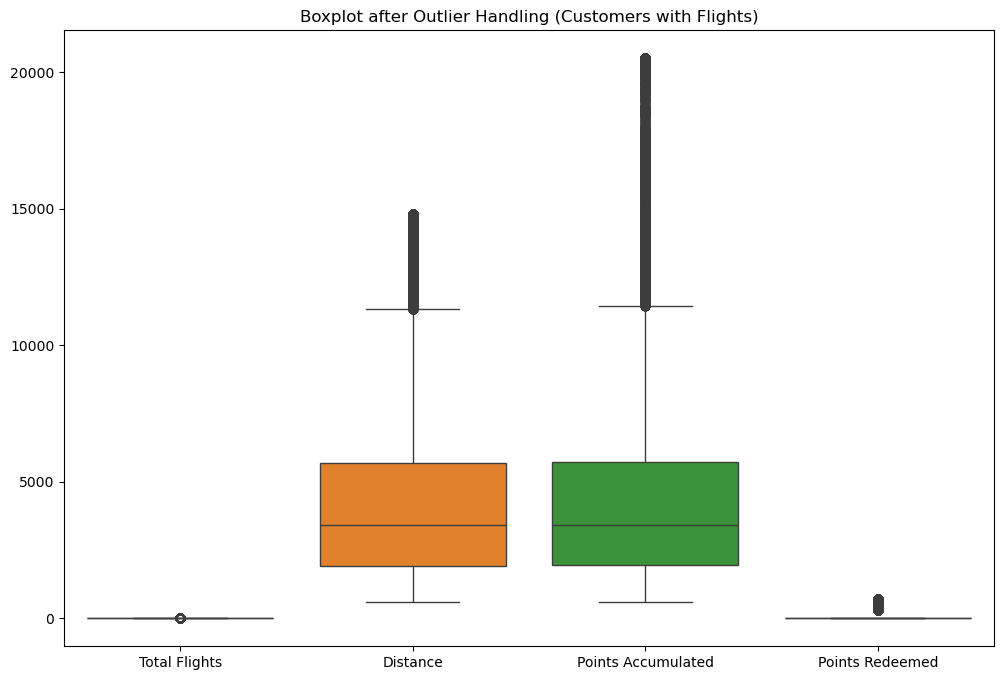

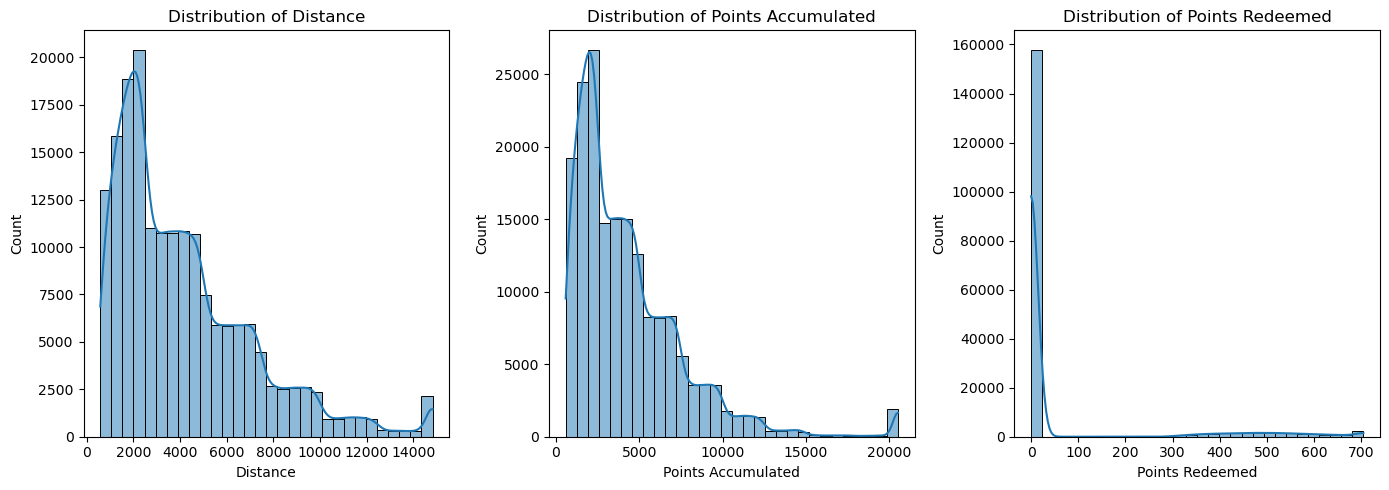

In [15]:
Flight['Has_Flights'] = (Flight['Total Flights'] > 0).astype(int)
flight_with_flights = Flight[Flight['Has_Flights'] == 1].copy()
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df.loc[:, column] = df[column].clip(lower=lower_bound, upper=upper_bound)  

columns_to_cap = ['Distance', 'Points Accumulated', 'Points Redeemed']
for column in columns_to_cap:
    cap_outliers(flight_with_flights, column)
plt.figure(figsize=(12, 8))
sns.boxplot(data=flight_with_flights[['Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed']])
plt.title('Boxplot after Outlier Handling (Customers with Flights)')
plt.show()

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.histplot(flight_with_flights['Distance'], bins=30, kde=True)
plt.title('Distribution of Distance')

plt.subplot(1, 3, 2)
sns.histplot(flight_with_flights['Points Accumulated'], bins=30, kde=True)
plt.title('Distribution of Points Accumulated')

plt.subplot(1, 3, 3)
sns.histplot(flight_with_flights['Points Redeemed'], bins=30, kde=True)
plt.title('Distribution of Points Redeemed')

plt.tight_layout()
plt.show()


1- Boxplot (after outlier handling):

* The boxplot shows the distribution of Total Flights, Distance, Points Accumulated, and Points Redeemed after capping extreme outliers.
* Even after outlier capping, there are still some high values in Points Accumulated and Points Redeemed.
  
2- Distribution Plots:

* Distance and Points Accumulated show a right-skewed distribution, indicating a majority of customers travel shorter distances and accumulate lower points.
Points Redeemed are skewed heavily towards zero, showing that many customers are redeeming very few points.

Correlation Matrix:

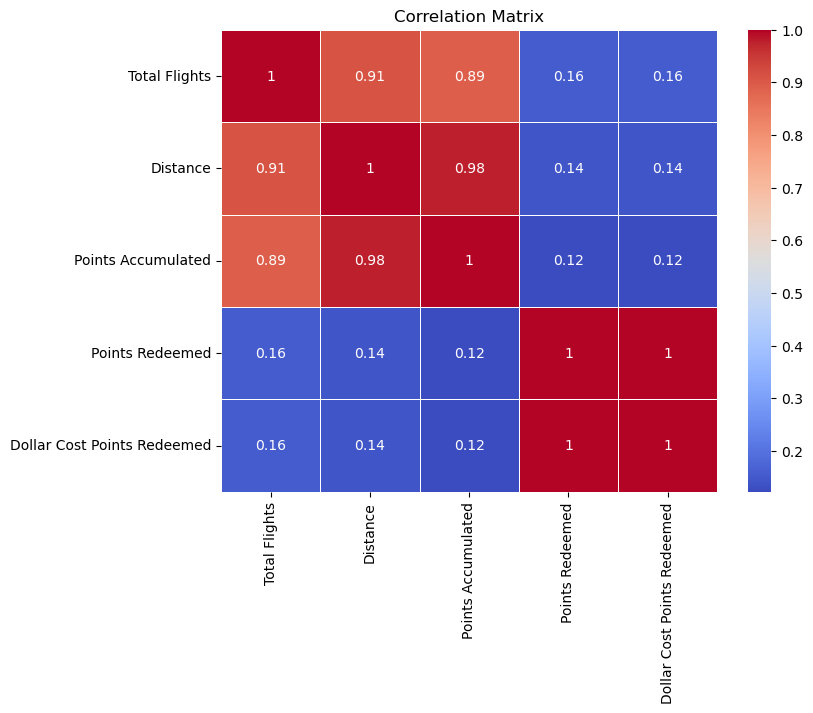

In [78]:
correlation_matrix = Flight[['Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed' ,'Dollar Cost Points Redeemed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* Strong positive correlation between Total Flights, Distance, and Points Accumulated, suggesting that more flights lead to greater distance and more points.
* also i can notice that the points accumulated ≈ Distance 

In [19]:
print(Customer.shape)
print(Customer.info())
print(Customer.head())

(16737, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float

In [21]:
Customer.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [23]:
missing_values = Customer.isnull().sum()
unique_values = Customer.nunique()
missing_values, unique_values

(Loyalty Number            0
 Country                   0
 Province                  0
 City                      0
 Postal Code               0
 Gender                    0
 Education                 0
 Salary                 4238
 Marital Status            0
 Loyalty Card              0
 CLV                       0
 Enrollment Type           0
 Enrollment Year           0
 Enrollment Month          0
 Cancellation Year     14670
 Cancellation Month    14670
 dtype: int64,
 Loyalty Number        16737
 Country                   1
 Province                 11
 City                     29
 Postal Code              55
 Gender                    2
 Education                 5
 Salary                 5890
 Marital Status            3
 Loyalty Card              3
 CLV                    7984
 Enrollment Type           2
 Enrollment Year           7
 Enrollment Month         12
 Cancellation Year         6
 Cancellation Month       12
 dtype: int64)

* I noticed too many customers with null salary 
* some customers have cancelled their loyalty subscription
* Salary: There is a negative minimum value, which is likely a data entry error.

* CLV: The Customer Lifetime Value has a wide range, with a mean of 7,988.90 and a maximum of 83,325.38.

* Enrollment and Cancellation: Most customers enrolled between 2012 and 2018, with a median enrollment year of 2015. Cancellations are less frequent, with data available for only 2,067 customers.
  
* many customers have a null salary 

In [25]:
mean_salaries = Customer.groupby('Education')['Salary'].mean()

high_school_mean_salary = mean_salaries['High School or Below']
bachelor_mean_salary = mean_salaries['Bachelor']

print(f"Mean Salary for High School or Below: {high_school_mean_salary}")
print(f"Mean Salary for Bachelor: {bachelor_mean_salary}")


Mean Salary for High School or Below: 61071.71867007673
Mean Salary for Bachelor: 72451.061575179


In [27]:
negative_salary_customers = Customer[Customer['Salary'] < 0]
print(f"Number of customers with negative salary: {len(negative_salary_customers)}")


Number of customers with negative salary: 20


In [31]:
import numpy as np

Customer['Salary'] = Customer['Salary'].apply(lambda x: np.nan if x < 0 else x)

mean_salaries = Customer.groupby('Education')['Salary'].mean()

high_school_mean_salary = mean_salaries['High School or Below']
bachelor_mean_salary = mean_salaries['Bachelor']
college_imputed_salary = (high_school_mean_salary + bachelor_mean_salary) / 2

Customer.loc[(Customer['Education'] == 'College') & (Customer['Salary'].isnull()), 'Salary'] = college_imputed_salary

Customer['Salary'] = Customer.groupby('Education')['Salary'].transform(lambda x: x.fillna(x.mean()))

* i managed to change the null and negative salaries based on their mean salary for each educationel group

* Now let's merge our datasets

In [33]:
aggregated_flight_data = Flight.groupby('Loyalty Number').agg({
    'Total Flights': 'sum',
    'Distance': 'sum',
    'Points Accumulated': 'sum',
    'Points Redeemed': 'sum'
}).reset_index()
merged_df = pd.merge(Customer, aggregated_flight_data, on='Loyalty Number', how='left')
merged_df['Total Flights'] = merged_df['Total Flights'].fillna(0)
print(merged_df.info())
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              16737 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
 16  Tota

* Analyze customer demographics - group by gender and look at average total flights, distance, and points

In [35]:
demographic_analysis = merged_df.groupby('Gender').agg({
    'Total Flights': 'mean',
    'Distance': 'mean',
    'Points Accumulated': 'mean',
    'Salary': 'mean'
}).reset_index()

print(demographic_analysis)

   Gender  Total Flights      Distance  Points Accumulated        Salary
0  Female      30.210702  45275.520571        47291.095719  76296.701654
1    Male      30.591570  45886.227813        47896.106341  76214.296777


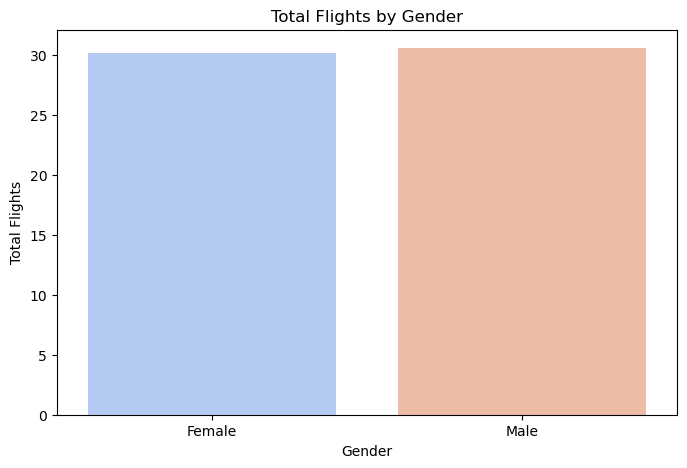

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total Flights', hue='Gender', data=demographic_analysis, palette='coolwarm', legend=False)
plt.title('Total Flights by Gender')
plt.show()

* Analyze customer loyalty status (Loyalty Card) and its relationship to total flights

In [39]:
loyalty_analysis = merged_df.groupby('Loyalty Card').agg({
    'Total Flights': 'mean',
    'Distance': 'mean',
    'Points Accumulated': 'mean',
    'Salary': 'mean'
}).reset_index()
print(loyalty_analysis)

  Loyalty Card  Total Flights      Distance  Points Accumulated        Salary
0       Aurora      30.603675  46226.186060        48335.029892  76180.765143
1         Nova      30.473814  45762.277023        47850.896667  76150.835059
2         Star      30.254157  45153.107503        47066.353280  76367.222845


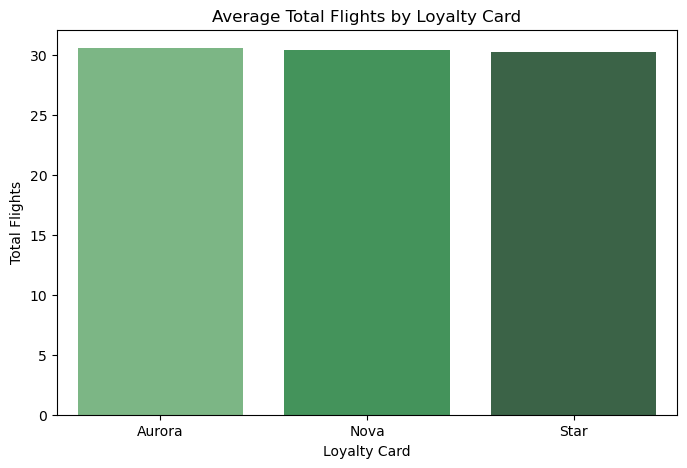

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Loyalty Card', y='Total Flights', hue='Loyalty Card', data=loyalty_analysis, palette='Greens_d',legend=False)
plt.title('Average Total Flights by Loyalty Card')
plt.show()

* No impact for the gender or the loyalty Card on the flight activity 

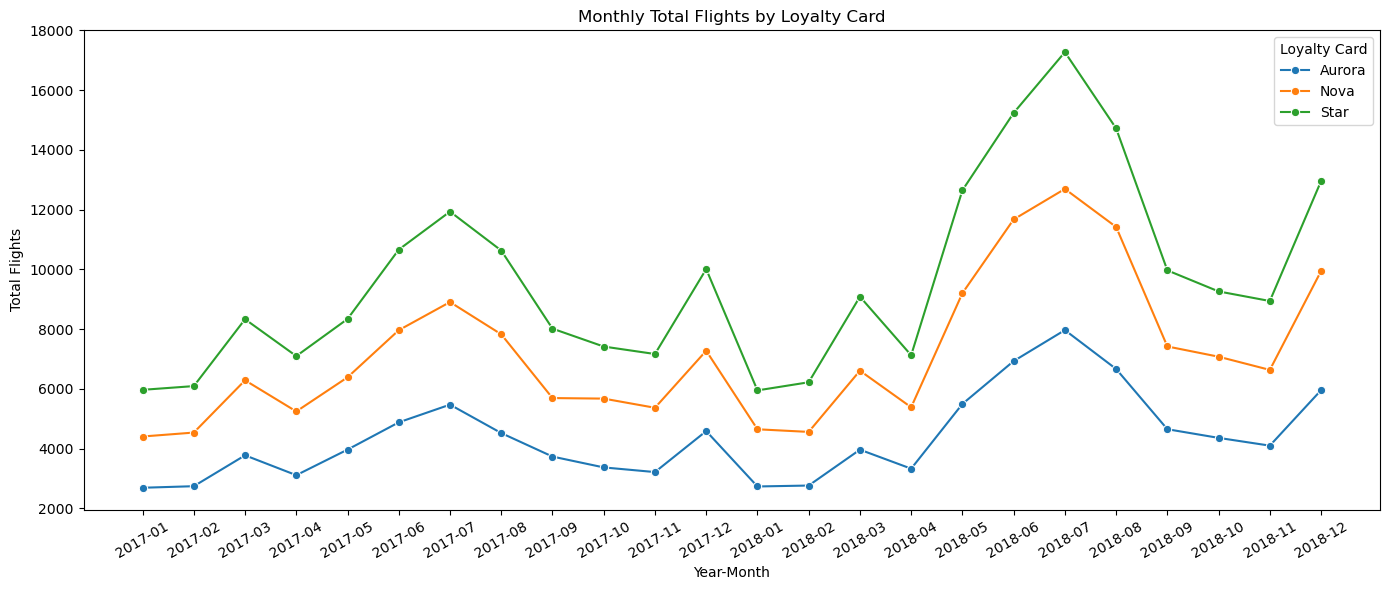

In [43]:
merged_df1 = pd.merge(Flight, Customer, on='Loyalty Number', how='left')

time_series_loyalty = merged_df1.groupby(['Year', 'Month', 'Loyalty Card']).agg({
    'Total Flights': 'sum',
}).reset_index()
time_series_loyalty['Year-Month'] = time_series_loyalty['Year'].astype(str) + '-' + time_series_loyalty['Month'].astype(str).str.zfill(2)
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year-Month', y='Total Flights', hue='Loyalty Card', data=time_series_loyalty, marker='o')
plt.title('Monthly Total Flights by Loyalty Card')
plt.xlabel('Year-Month')
plt.ylabel('Total Flights')
plt.xticks(rotation=30)  
plt.tight_layout()
plt.show()

* Customers with a Star loyalty card tend to take more flights compared to Nova customers, who in turn take more flights than Aurora customers.

In [45]:
unique_customers_per_card = merged_df.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index()
unique_customers_per_card.columns = ['Loyalty Card', 'Unique Customer Count']
print(unique_customers_per_card)

  Loyalty Card  Unique Customer Count
0       Aurora                   3429
1         Nova                   5671
2         Star                   7637


* The higher number of flights taken by Star loyalty card holders is likely because there are more customers with Star cards compared to those with Nova or Aurora cards.

In [47]:
Marital_analysis = merged_df.groupby('Marital Status').agg({
    'Total Flights': 'mean',
    'Distance': 'mean',
    'Points Accumulated': 'mean',
    'Salary': 'mean'
}).reset_index()
print(Marital_analysis)

  Marital Status  Total Flights      Distance  Points Accumulated  \
0       Divorced      30.127085  45136.864972        47206.679905   
1        Married      30.358500  45494.318644        47466.576682   
2         Single      30.644068  46012.473015        48081.054527   

         Salary  
0  81309.465379  
1  77210.330631  
2  71345.206879  


* The variation in total flights between the groups is minimal, suggesting that marital status may not have a strong influence on flight activity.

In [49]:
Edu_analysis = merged_df.groupby('Education').agg({
    'Total Flights': 'mean',
    'Distance': 'mean',
    'Points Accumulated': 'mean',
    'Salary': 'mean'
}).reset_index()
print(Edu_analysis)

              Education  Total Flights      Distance  Points Accumulated  \
0              Bachelor      30.262721  45423.128210        47540.939952   
1               College      30.610901  45771.543417        47652.852643   
2                Doctor      30.329700  45174.231608        46546.941417   
3  High School or Below      30.997442  46441.236573        48774.151535   
4                Master      30.659449  46456.190945        47830.739173   

          Salary  
0   72645.926262  
1   66929.822286  
2  178608.897820  
3   61213.718310  
4  103757.848425  


* The data suggests that education level does not have a strong influence on flight activity, as the average number of flights across all education groups is quite similar.

In [51]:
province_analysis = merged_df.groupby('Province').agg({
'Total Flights': 'mean',
    'Distance': 'mean',
    'Points Accumulated': 'mean',
    'Salary': 'mean'
}).reset_index()
print(province_analysis)

                Province  Total Flights      Distance  Points Accumulated  \
0                Alberta      30.410733  45627.306502        47062.199174   
1       British Columbia      30.659560  45869.530279        48152.721932   
2               Manitoba      29.141337  43636.264438        44784.315350   
3          New Brunswick      31.383648  46994.526730        48686.138365   
4           Newfoundland      29.593023  44967.856589        46887.193798   
5            Nova Scotia      29.949807  45217.546332        46310.673745   
6                Ontario      30.367321  45598.495559        47500.936251   
7   Prince Edward Island      27.621212  41704.878788        42018.893939   
8                 Quebec      30.294848  45362.215758        47766.793030   
9           Saskatchewan      30.019560  44802.811736        46784.144254   
10                 Yukon      33.627273  50891.790909        53533.122727   

          Salary  
0   74533.836572  
1   76599.215452  
2   74905.833046  

1- Key Observations:
* Yukon has the highest average number of flights per customer, with 33.62 overall flights.
* New Brunswick follows closely with an average of 31.38 overall flights per customer
* Prince Edward Island has the lowest average number of flights per customer, with 27.62 overall flights, suggesting that customers from this province tend to travel less frequently on average.
* Other provinces like British Columbia, Quebec, and Ontario show similar flight activity, hovering around 30 flights per customer.

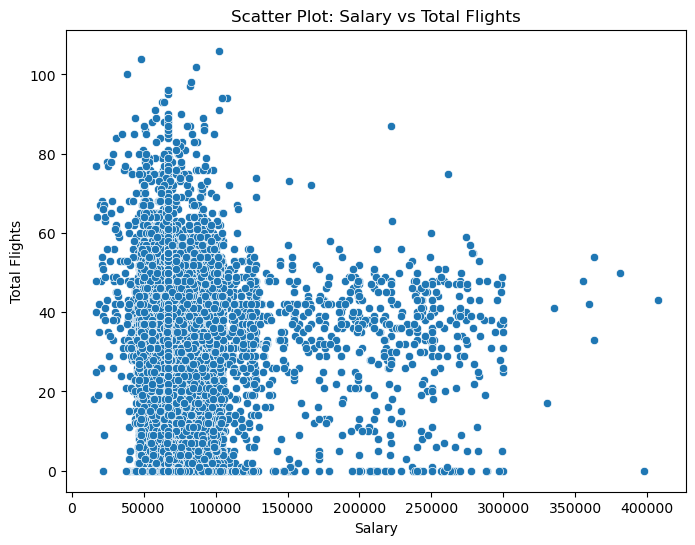

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='Total Flights', data=merged_df)
plt.title('Scatter Plot: Salary vs Total Flights')
plt.xlabel('Salary')
plt.ylabel('Total Flights')
plt.show()

In [55]:
correlation = merged_df['Salary'].corr(merged_df['Total Flights'])
print(f"Correlation between Salary and Total Flights: {correlation}")


Correlation between Salary and Total Flights: -0.0016751512639830146


In [61]:
correlation = merged_df['Total Flights'].corr(merged_df['CLV'])
print(f"Correlation between Total Flights and CLV: {correlation}")

Correlation between Total Flights and CLV: -0.005372009735502307


* CLV and Salary does not have any impact on the flight activity 

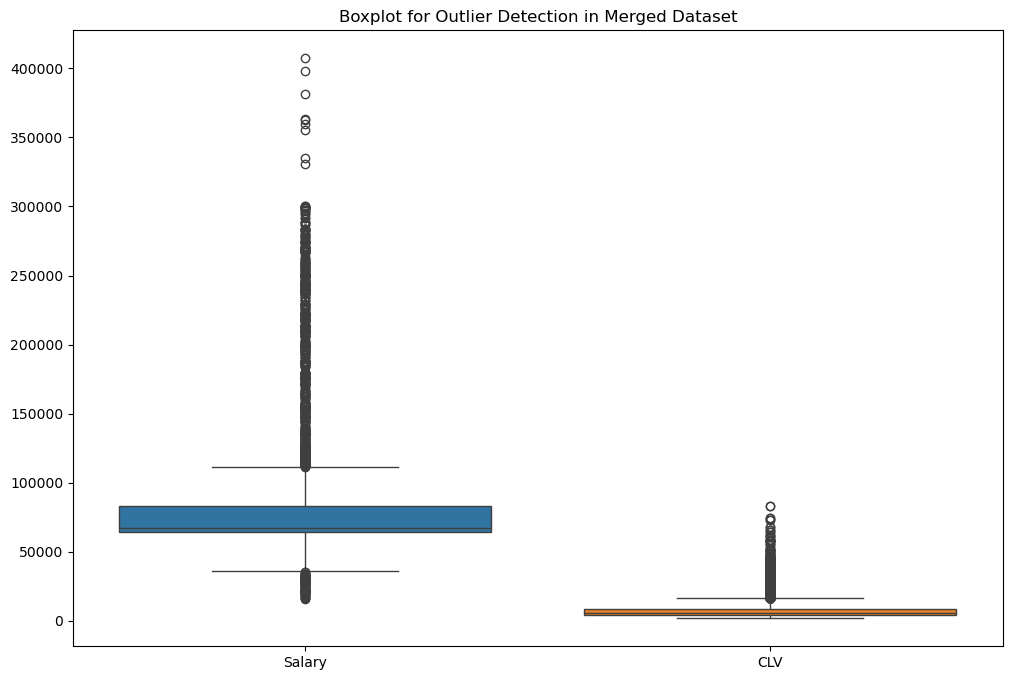

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df[[ 'Salary', 'CLV']])
plt.title('Boxplot for Outlier Detection in Merged Dataset')
plt.show()

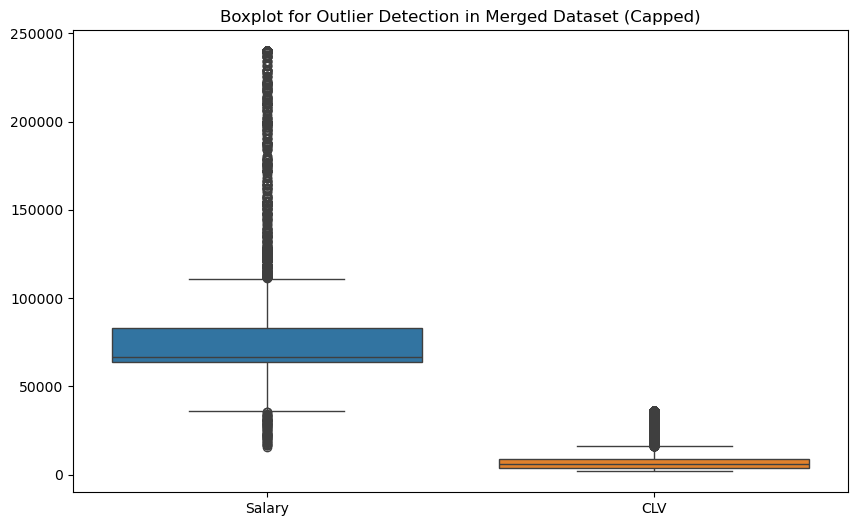

In [65]:
salary_99th_percentile = merged_df['Salary'].quantile(0.99)
clv_99th_percentile = merged_df['CLV'].quantile(0.99)
merged_df['Salary'] = merged_df['Salary'].apply(lambda x: salary_99th_percentile if x > salary_99th_percentile else x)
merged_df['CLV'] = merged_df['CLV'].apply(lambda x: clv_99th_percentile if x > clv_99th_percentile else x)
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[['Salary', 'CLV']])
plt.title('Boxplot for Outlier Detection in Merged Dataset (Capped)')
plt.show()

In [73]:
flight_in_last_six_months = Flight[(Flight['Year'] == 2018) & (Flight['Month'] > 6)]

active_customers = flight_in_last_six_months['Loyalty Number'].unique()

merged_df['Churn'] = ((merged_df['Cancellation Year'] > 0) | (~merged_df['Loyalty Number'].isin(active_customers))).astype(int)

churn_by_customer = merged_df.groupby('Loyalty Number')['Churn'].max().reset_index()

churn_counts = churn_by_customer['Churn'].value_counts()

print(f'Churned: {churn_counts[1]}, Active: {churn_counts[0]}')


Churned: 2067, Active: 14670
